In [2]:
#!pip install plotnine 
#!pip install numpy
#!pip install scikit-misc

In [18]:
import pandas as pd
from afinn import Afinn
import datetime
from plotnine import *

afinn = Afinn()

df = pd.read_csv("data/500000TweetsHydratedScored.tsv", sep="\t")
df['date'] = pd.to_datetime(df['date'], format="%Y-%m-%d")
df.dtypes


#https://www.kaggle.com/gpreda/covid19-tweets
#covid19tweets = pd.read_csv("data/covid19_tweets.csv")
#user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
#type(covid19tweets)
#print(covid19tweets[["date","text"]])
#print(covid19tweets["text"])

date                     datetime64[ns, UTC]
AfinnSentiment                         int64
AfinnDefaultSentiment                float64
NRCValence                           float64
NRCArousal                           float64
NRCValenceMean                       float64
NRCArousalMean                       float64
dtype: object

In [28]:
p = (ggplot(df.sample(5000))
 + aes(x='date', y='AfinnSentiment')
 + geom_point(alpha = 0.5)
 + geom_smooth(method="glm", color="red")
 #+ geom_quantile()
 + scale_y_continuous(trans='log2')
 + labs(title='sentiment plot', x='Time', y='Sentiment') # customizing labels
)
p
p.save("plots/sentimentovertime.png")
#https://www.practicaldatascience.org/html/plotting_part1.html

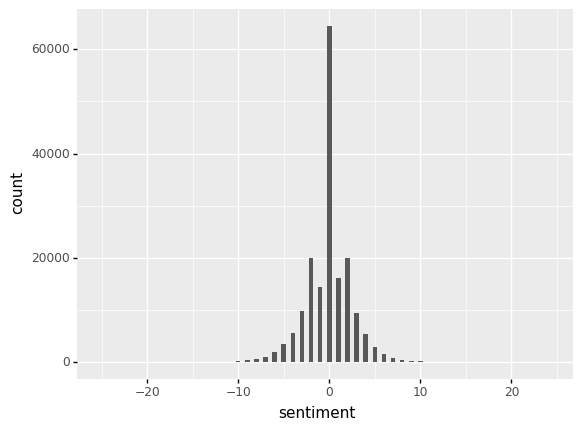

<ggplot: (179509802457)>

In [8]:
ggplot(df, aes(x='sentiment')) + geom_histogram(binwidth=.5)

In [29]:
(ggplot(df.sample(50), aes(x='AfinnSentiment'))
+ geom_histogram(binwidth=.5, colour="black", fill="white")
#+ geom_histogram(aes(y=..density..), binwidth=.5, colour="black", fill="white") # Histogram with density instead of count on y-axis
+ geom_density(alpha=.2, fill="#FF6666")  # Overlay with transparent density plot
#+ geom_vline(aes(xintercept=mean('sentiment', na.rm=T)), color="red", linetype="dashed", size=1)
)
#http://www.cookbook-r.com/Graphs/Plotting_distributions_(ggplot2)/

KeyboardInterrupt: 

In [10]:
p = (ggplot(scoredf)
+ aes(x="date", y="sentiment")
+ geom_boxplot()
)
p.save("plots/boxPlotOverTime.png")

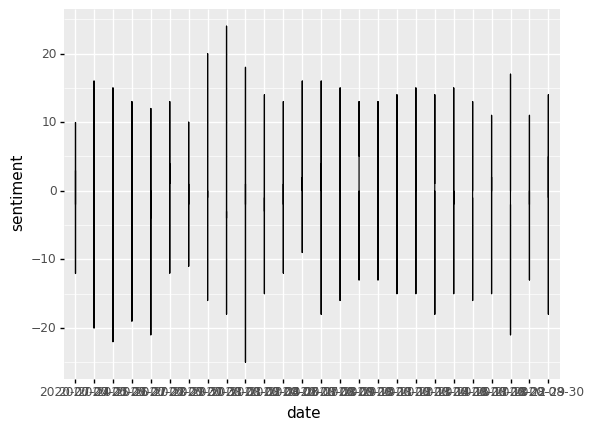

<ggplot: (98609783185)>

In [55]:
p = (ggplot(scoredf) 
+ aes(x='date', y='sentiment')
+ geom_line()
)
p #+ scale_x_datetime(breaks=date_breaks('1 hour'), labels=date_format('%H:%M')) + theme_light()

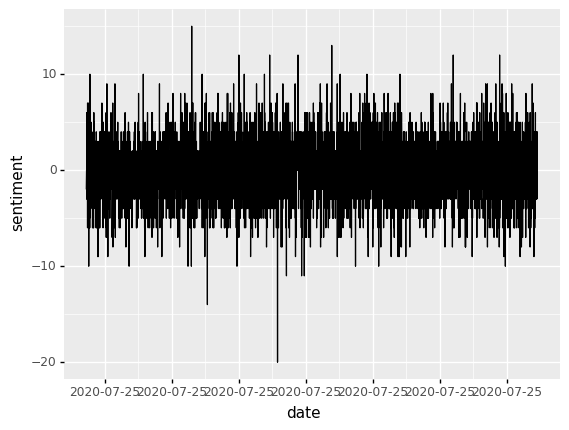

<ggplot: (129197318828)>

In [14]:
(ggplot(scoredf)         # defining what data to use
 + aes(x='date',y='sentiment')    # defining what variable to use
 + geom_line() # defining the type of plot to use
)

In [84]:
bing_word_counts %>%
        group_by(sentiment) %>%
        top_n(10) %>%
        ggplot(aes(reorder(word, n), n, fill = sentiment)) +
          geom_bar(alpha = 0.8, stat = "identity", show.legend = FALSE) +
          facet_wrap(~sentiment, scales = "free_y") +
          labs(y = "Contribution to sentiment", x = NULL) +
          coord_flip()

SyntaxError: invalid syntax (<ipython-input-84-eeda216800a9>, line 1)

In [5]:
counting = 0
score = []
for index, row in covid19tweets.iterrows():
    #print(row['text'], afinn.score(row['text']))
    score.append([
        datetime.datetime.strptime(row['date'], '%Y-%m-%d %H:%M:%S').date(), 
        afinn.score(row['text'])])
    counting+=1
    if (counting % 30000 == 0): print(counting/len(covid19tweets.index)*100, '%,', counting, '/', len(covid19tweets.index))
    #if counting >= 10000: break

scoredf = pd.DataFrame(score, columns = ['date','sentiment'])

16.749670589811732 %, 30000 / 179108
33.499341179623464 %, 60000 / 179108
50.24901176943521 %, 90000 / 179108
66.99868235924693 %, 120000 / 179108
83.74835294905867 %, 150000 / 179108
